# ТЕХНОЛОГИИ ПОСТРОЕНИЯ МОДЕЛЕЙ ДЕРЕВЬЕВ РЕШЕНИЙ

# **1. Подготовка исходных данных**

Сгенерировать исходные данные для обучения модели дерева решений.

Значения параметров выбираются из таблицы "Варианты".docx в соответствие с номером студента в списке группы в СДО.

Для задачи классификации.

In [88]:
from sklearn.tree import DecisionTreeClassifier # Библиотека для работы с деревьями решений
from sklearn.datasets import make_classification # Библиотека для создания синтетических наборов данных
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV # Библиотека для разделения данных на обучающую и тестовую выборки и для построения валидационных кривых, и для поиска гиперпараметров с использованием сетки
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay# Библиотека для построения матрицы ошибок (confusion matrix) и для визуализации матрицы ошибок
import matplotlib.pyplot as plt # Библиотека для построения графиков
from sklearn.metrics import accuracy_score # Библиотека для вычисления точности модели
from sklearn.preprocessing import StandardScaler # Библиотека для стандартизации данных
from sklearn.inspection import permutation_importance # Библиотека для оценки важности признаков методом перестановки

In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 184,
                           n_features = 3,
                           n_classes = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           class_sep = 0.71,
                           n_clusters_per_class = 1,
                           random_state = 1)

Разделить выборку на обучающую и тестовую.

Доля объектов в тестовой выборке - 0,3.

Использовать параметр `random_state` в соответствие со своим вариантом.

In [2]:
from sklearn.model_selection import train_test_split
# код# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # Укажите ваш random_state

# Вывод размеров выборок
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (128, 3)
Размер тестовой выборки: (56, 3)


In [7]:
import pandas as pd
import numpy as np

In [8]:
# Преобразование данных в DataFrame
columns = [f"Feature_{i+1}" for i in range(X.shape[1])] + ["Target"]

# Объединение признаков и целевой переменной для обучающей выборки
train_data = pd.DataFrame(np.column_stack((X_train, y_train)), columns=columns)

# Объединение признаков и целевой переменной для тестовой выборки
test_data = pd.DataFrame(np.column_stack((X_test, y_test)), columns=columns)

In [10]:
print("Обучающая выборка:")
train_data


Обучающая выборка:


,Feature_1,Feature_2,Feature_3,Target
0,0.883653,2.110605,0.254254,0.0
1,0.612343,0.556074,-0.350532,1.0
2,0.467258,-0.115985,1.130893,0.0
3,1.091223,-1.160170,0.267815,0.0
4,0.209147,-0.102887,0.129344,0.0
...,...,...,...,...
123,0.227267,-0.777859,1.268018,0.0
124,1.681330,1.350107,1.051576,0.0
125,1.352166,-0.175459,1.484492,0.0
126,0.655452,-1.565738,-0.255287,1.0


In [12]:
print("\nТестовая выборка:")
test_data.head()



Тестовая выборка:


,Feature_1,Feature_2,Feature_3,Target
0,0.662312,0.169869,0.004117,1.0
1,0.706425,-1.952105,-0.133446,1.0
2,1.653819,0.477610,0.072009,0.0
3,0.940587,-0.418938,-0.876891,1.0
4,0.020890,0.617986,-0.030796,0.0


# **2. Обучение модели**

Вычислить количество вопросов, которое необходимо проанализировать в корневом узле дерева решений для его разделения.

In [17]:
from sklearn.tree import DecisionTreeClassifier
# Создание и обучение дерева решений
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

# Вывод информации о дереве
print("Количество признаков, используемых для разделения:", tree.n_features_in_)
print("Количество признаков, анализируемых в корневом узле:", X.shape[1])

Количество признаков, используемых для разделения: 3
Количество признаков, анализируемых в корневом узле: 3


Обучить модель дерева решений на тренировочной выборке с гиперпараметрами по умолчанию.

In [18]:
# Создание и обучение модели дерева решений с гиперпараметрами по умолчанию
tree = DecisionTreeClassifier(random_state=1)  # Устанавливаем random_state для воспроизводимости
tree.fit(X_train, y_train)

# Вывод информации о модели
print("Модель обучена на тренировочной выборке.")
print("Количество признаков, используемых для разделения:", tree.n_features_in_)
print("Важность признаков:", tree.feature_importances_)

Модель обучена на тренировочной выборке.
Количество признаков, используемых для разделения: 3
Важность признаков: [0.14111076 0.08179825 0.77709099]


Визуализировать полученное дерево.

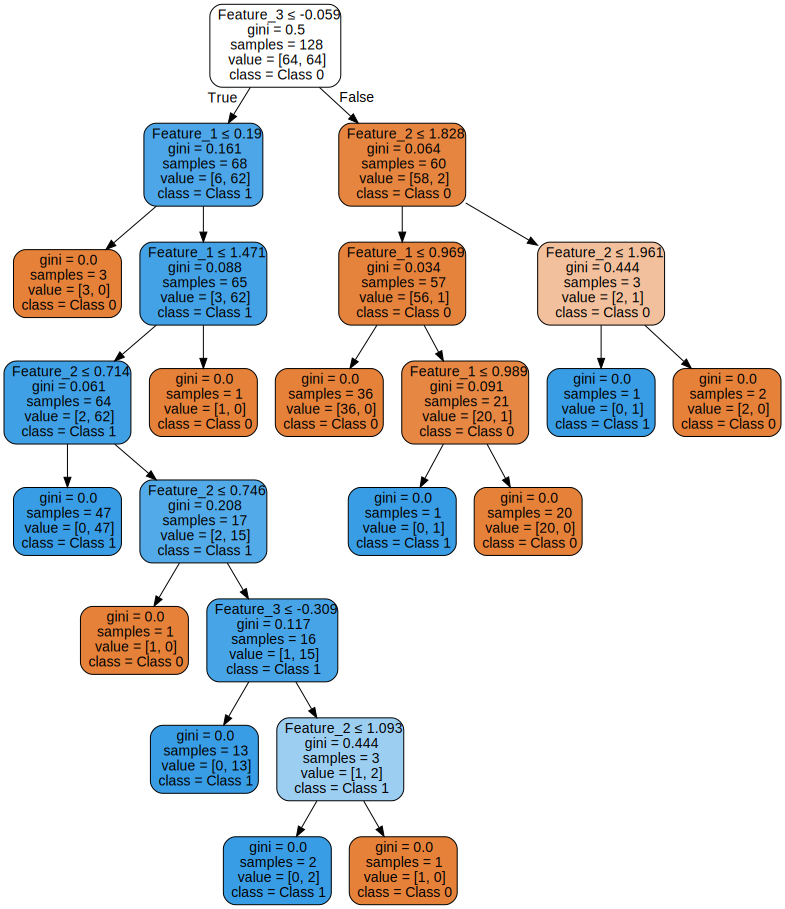

In [20]:
import graphviz
from sklearn.tree import export_graphviz
# Экспорт дерева в формате .dot
dot_data = export_graphviz(tree,
                           out_file=None,
                           feature_names=[f"Feature_{i+1}" for i in range(X.shape[1])],  # Имена признаков
                           class_names=["Class 0", "Class 1"],  # Имена классов
                           filled=True,  # Заливка узлов
                           rounded=True,  # Закругленные углы
                           special_characters=True)  # Специальные символы

# Визуализация дерева в блокноте
graph = graphviz.Source(dot_data)
graph

Вывести количество уровней (глубину) дерева.

In [21]:
# Вывод глубины дерева
depth = tree.get_depth()
print(f"Глубина дерева: {depth}")

Глубина дерева: 7


Вывести количество листев дерева.

In [22]:
# Вывод количества листьев дерева
n_leaves = tree.tree_.n_leaves
print(f"Количество листьев дерева: {n_leaves}")

Количество листьев дерева: 12


Визуализировать полученное дерево с отображением одного уровня.

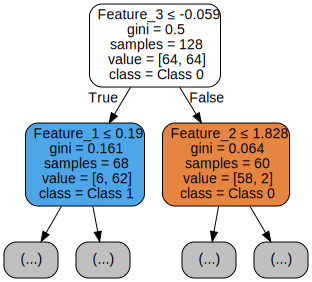

In [23]:
# Экспорт дерева в формате .dot с ограничением глубины (один уровень)
dot_data = export_graphviz(tree,
                           out_file=None,
                           feature_names=[f"Feature_{i+1}" for i in range(X.shape[1])],  # Имена признаков
                           class_names=["Class 0", "Class 1"],  # Имена классов
                           filled=True,  # Заливка узлов
                           rounded=True,  # Закругленные углы
                           special_characters=True,  # Специальные символы
                           max_depth=1)  # Ограничение глубины дерева

# Визуализация дерева в блокноте
graph = graphviz.Source(dot_data)
graph

С использованием выражений, рассмотренных в лекции 6, вычислить прирост информации для вопроса, который был выбран в корневом узле.

In [24]:
# Получение признака, выбранного в корневом узле
root_feature = tree.tree_.feature[0]  # Индекс признака в корневом узле
print(f"Признак, выбранный в корневом узле: Feature_{root_feature + 1}")

# Вычисление энтропии
def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

# Энтропия исходного набора данных
H_S = entropy(y_train)
print(f"Энтропия исходного набора данных: {H_S:.4f}")

# Разделение данных по значениям признака, выбранного в корневом узле
feature_values = X_train[:, root_feature]
threshold = tree.tree_.threshold[0]  # Порог разделения в корневом узле
left_mask = feature_values <= threshold
right_mask = feature_values > threshold

# Энтропия левого и правого подмножеств
H_left = entropy(y_train[left_mask])
H_right = entropy(y_train[right_mask])
print(f"Энтропия левого подмножества: {H_left:.4f}")
print(f"Энтропия правого подмножества: {H_right:.4f}")

# Вычисление прироста информации
weight_left = np.sum(left_mask) / len(y_train)
weight_right = np.sum(right_mask) / len(y_train)
information_gain = H_S - (weight_left * H_left + weight_right * H_right)
print(f"Прирост информации для признака Feature_{root_feature + 1}: {information_gain:.4f}")

Признак, выбранный в корневом узле: Feature_3
Энтропия исходного набора данных: 1.0000
Энтропия левого подмножества: 0.4306
Энтропия правого подмножества: 0.2108
Прирост информации для признака Feature_3: 0.6724


С использованием выражений, рассмотренных в лекции 6, вычислить прирост информации для любого альтернативного вопроса в корневом узле и сравнить полученные значения.

In [25]:
# Вычисление энтропии
def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

# Энтропия исходного набора данных
H_S = entropy(y_train)
print(f"Энтропия исходного набора данных: {H_S:.4f}")

# Функция для вычисления прироста информации для заданного признака
def information_gain(X_train, y_train, feature_index):
    feature_values = X_train[:, feature_index]
    thresholds = np.unique(feature_values)  # Уникальные значения признака
    max_gain = 0
    best_threshold = None

    for threshold in thresholds:
        # Разделение данных на подмножества
        left_mask = feature_values <= threshold
        right_mask = feature_values > threshold

        # Энтропия левого и правого подмножеств
        H_left = entropy(y_train[left_mask])
        H_right = entropy(y_train[right_mask])

        # Веса подмножеств
        weight_left = np.sum(left_mask) / len(y_train)
        weight_right = np.sum(right_mask) / len(y_train)

        # Прирост информации
        gain = H_S - (weight_left * H_left + weight_right * H_right)

        # Выбор лучшего порога
        if gain > max_gain:
            max_gain = gain
            best_threshold = threshold

    return max_gain, best_threshold

# Вычисление прироста информации для всех признаков
feature_gains = {}
for feature_index in range(X_train.shape[1]):
    gain, threshold = information_gain(X_train, y_train, feature_index)
    feature_gains[f"Feature_{feature_index + 1}"] = (gain, threshold)

# Вывод результатов
print("\nПрирост информации для каждого признака:")
for feature, (gain, threshold) in feature_gains.items():
    print(f"{feature}: Прирост информации = {gain:.4f}, Порог = {threshold:.4f}")

# Сравнение прироста информации
best_feature = max(feature_gains, key=lambda k: feature_gains[k][0])
print(f"\nЛучший признак для разделения: {best_feature} с приростом информации {feature_gains[best_feature][0]:.4f}")


Энтропия исходного набора данных: 1.0000

Прирост информации для каждого признака:
Feature_1: Прирост информации = 0.2521, Порог = 0.3276
Feature_2: Прирост информации = 0.0238, Порог = 1.8665
Feature_3: Прирост информации = 0.6724, Порог = -0.0889

Лучший признак для разделения: Feature_3 с приростом информации 0.6724


# **3. Оценивание качества модели**

**Для задачи классификации**:

Построить матрицу ошибок для обучающей и тестовой выборок.

In [29]:
# Предсказания на обучающей и тестовой выборках
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
y_train_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [30]:
y_test_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0])

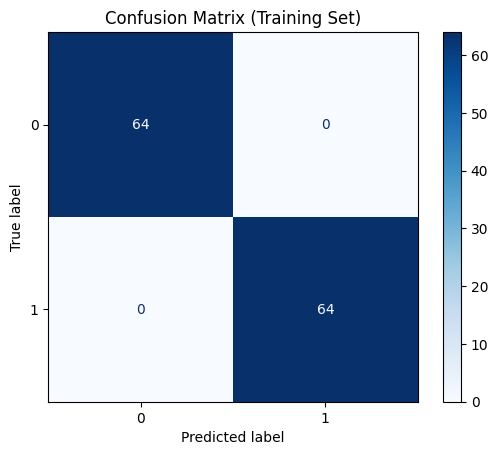

In [33]:
# Построение матрицы ошибок для обучающей выборки
cm_train = confusion_matrix(y_train, y_train_pred)
# Визуализация матрицы ошибок для обучающей выборки
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=tree.classes_)
disp_train.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Training Set)")
plt.show()

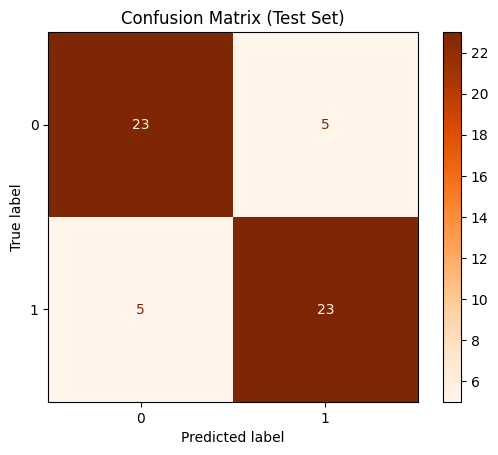

In [35]:
# Построение матрицы ошибок для тестовой выборки
cm_test = confusion_matrix(y_test, y_test_pred)
# Визуализация матрицы ошибок для тестовой выборки
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=tree.classes_)
disp_test.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix (Test Set)")
plt.show()

Сделать вывод о качестве модели.

Вычислить метрику accuracy для обучающей и тестовой выборок.

In [38]:
# Вычисление точности для обучающей выборки
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Точность на обучающей выборке: {accuracy_train:.4f}")

# Вычисление точности для тестовой выборки
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Точность на тестовой выборке: {accuracy_test:.4f}")

Точность на обучающей выборке: 1.0000
Точность на тестовой выборке: 0.8214


Сделать вывод о качестве модели.

# **4. Подбор оптимальных гиперпараметров модели дерева решений**

Осуществить подбор гиперараметров модели дерева решений:
-  `max_depth`;
- `min_samples_leaf`;
- `max_features`.

## Использование валидационных кривых

Построить валидационные кривые для оценивания оптимального диапазона изменения гиперпараметров.

Параметр кросс-валидации - 5.

Метрика качества модели дерева решений:
- для классификации - accuracy;
- для регрессии - R2.

Построить валидационные кривые для гиперпараметра `max_depth`.

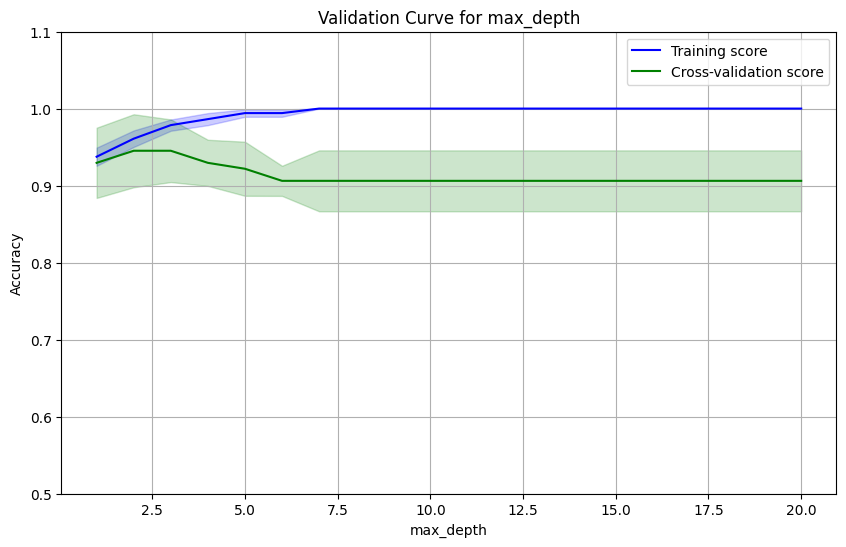

In [40]:
# Определение диапазона значений для max_depth
param_range = np.arange(1, 21)  # Проверяем значения от 1 до 20

# Построение валидационной кривой для max_depth
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=1),
    X_train, y_train,
    param_name="max_depth",
    param_range=param_range,
    cv=5,  # 5-кратная кросс-валидация
    scoring="accuracy"  # Метрика качества
)

# Вычисление средних значений и стандартных отклонений
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Построение валидационной кривой
plt.figure(figsize=(10, 6))
plt.title("Validation Curve for max_depth")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.1)

# График для обучающей выборки
plt.plot(param_range, train_scores_mean, label="Training score", color="blue")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="blue", alpha=0.2)

# График для тестовой выборки
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color="green", alpha=0.2)

plt.legend(loc="best")
plt.grid()
plt.show()

Обучить модель дерева решений с произвольным значением гиперпараметра `max_depth` из найденного диапазона и оценить качество модели на обучающей и тестовой выборках по соответствующей метрике.

In [46]:
# Определение гиперпараметра max_depth
max_depth = 4

# Создание и обучение модели дерева решений
tree = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
tree.fit(X_train, y_train)

# Предсказания на обучающей и тестовой выборках
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Вычисление точности для обучающей выборки
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Точность на обучающей выборке (max_depth={max_depth}): {accuracy_train:.4f}")

# Вычисление точности для тестовой выборки
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Точность на тестовой выборке (max_depth={max_depth}): {accuracy_test:.4f}")

Точность на обучающей выборке (max_depth=4): 0.9844
Точность на тестовой выборке (max_depth=4): 0.8393


Построить валидационные кривые для гиперпараметра `min_samples_leaf`.

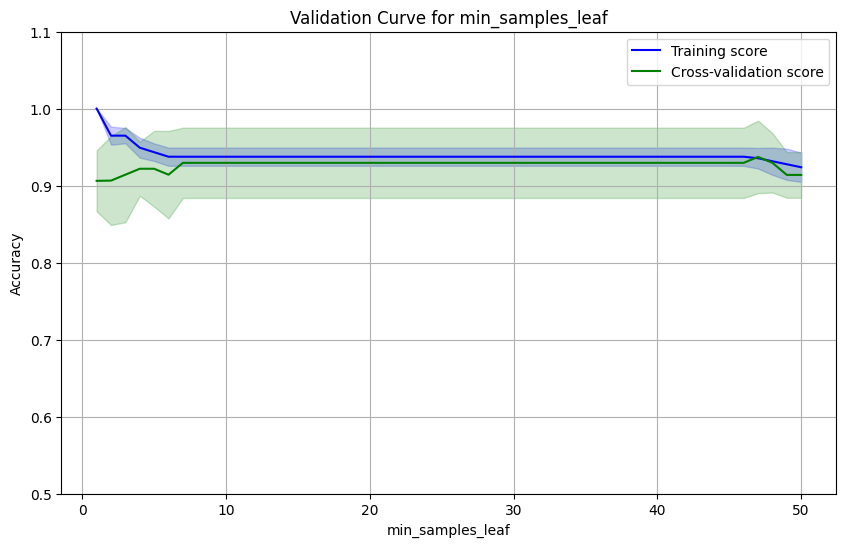

In [49]:
# Определение диапазона значений для min_samples_leaf
param_range = np.arange(1, 51)  # Проверяем значения от 1 до 50

# Построение валидационной кривой для min_samples_leaf
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=1),
    X_train, y_train,
    param_name="min_samples_leaf",
    param_range=param_range,
    cv=5,  # 5-кратная кросс-валидация
    scoring="accuracy"  # Метрика качества
)

# Вычисление средних значений и стандартных отклонений
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Построение валидационной кривой
plt.figure(figsize=(10, 6))
plt.title("Validation Curve for min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.1)

# График для обучающей выборки
plt.plot(param_range, train_scores_mean, label="Training score", color="blue")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="blue", alpha=0.2)

# График для тестовой выборки
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color="green", alpha=0.2)

plt.legend(loc="best")
plt.grid()
plt.show()

In [52]:
train_scores_mean

array([1.        , 0.96483914, 0.96483914, 0.94920998, 0.94334666,
       0.93748334, 0.93748334, 0.93748334, 0.93748334, 0.93748334,
       0.93748334, 0.93748334, 0.93748334, 0.93748334, 0.93748334,
       0.93748334, 0.93748334, 0.93748334, 0.93748334, 0.93748334,
       0.93748334, 0.93748334, 0.93748334, 0.93748334, 0.93748334,
       0.93748334, 0.93748334, 0.93748334, 0.93748334, 0.93748334,
       0.93748334, 0.93748334, 0.93748334, 0.93748334, 0.93748334,
       0.93748334, 0.93748334, 0.93748334, 0.93748334, 0.93748334,
       0.93748334, 0.93748334, 0.93748334, 0.93748334, 0.93748334,
       0.93748334, 0.93552256, 0.93160099, 0.92769846, 0.92381496])

In [53]:
train_scores_std


array([0.        , 0.01170575, 0.00992864, 0.01292265, 0.01141687,
       0.01181251, 0.01181251, 0.01181251, 0.01181251, 0.01181251,
       0.01181251, 0.01181251, 0.01181251, 0.01181251, 0.01181251,
       0.01181251, 0.01181251, 0.01181251, 0.01181251, 0.01181251,
       0.01181251, 0.01181251, 0.01181251, 0.01181251, 0.01181251,
       0.01181251, 0.01181251, 0.01181251, 0.01181251, 0.01181251,
       0.01181251, 0.01181251, 0.01181251, 0.01181251, 0.01181251,
       0.01181251, 0.01181251, 0.01181251, 0.01181251, 0.01181251,
       0.01181251, 0.01181251, 0.01181251, 0.01181251, 0.01181251,
       0.01181251, 0.01337453, 0.01764621, 0.02025643, 0.01901394])

In [54]:
test_scores_mean


array([0.90615385, 0.90646154, 0.91415385, 0.92184615, 0.92184615,
       0.91415385, 0.92953846, 0.92953846, 0.92953846, 0.92953846,
       0.92953846, 0.92953846, 0.92953846, 0.92953846, 0.92953846,
       0.92953846, 0.92953846, 0.92953846, 0.92953846, 0.92953846,
       0.92953846, 0.92953846, 0.92953846, 0.92953846, 0.92953846,
       0.92953846, 0.92953846, 0.92953846, 0.92953846, 0.92953846,
       0.92953846, 0.92953846, 0.92953846, 0.92953846, 0.92953846,
       0.92953846, 0.92953846, 0.92953846, 0.92953846, 0.92953846,
       0.92953846, 0.92953846, 0.92953846, 0.92953846, 0.92953846,
       0.92953846, 0.93723077, 0.92953846, 0.91384615, 0.91384615])

In [55]:
test_scores_std

array([0.03957167, 0.05767405, 0.06179485, 0.03512817, 0.04916727,
       0.0568057 , 0.04562155, 0.04562155, 0.04562155, 0.04562155,
       0.04562155, 0.04562155, 0.04562155, 0.04562155, 0.04562155,
       0.04562155, 0.04562155, 0.04562155, 0.04562155, 0.04562155,
       0.04562155, 0.04562155, 0.04562155, 0.04562155, 0.04562155,
       0.04562155, 0.04562155, 0.04562155, 0.04562155, 0.04562155,
       0.04562155, 0.04562155, 0.04562155, 0.04562155, 0.04562155,
       0.04562155, 0.04562155, 0.04562155, 0.04562155, 0.04562155,
       0.04562155, 0.04562155, 0.04562155, 0.04562155, 0.04562155,
       0.04562155, 0.04710205, 0.03859546, 0.02965681, 0.02965681])

Обучить модель дерева решений с произвольным значением гиперпараметра `min_samples_leaf` из найденного диапазона и зафиксированном на предыдущем шаге значением гиперпараметра `max_depth`.

Оценить качество модели на обучающей и тестовой выборках по соответствующей метрике.

In [56]:
# Определение гиперпараметров
max_depth = 4  # Зафиксированное значение из предыдущего шага
min_samples_leaf = 10  # Выберите значение из найденного диапазона

# Создание и обучение модели дерева решений
tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=1)
tree.fit(X_train, y_train)

# Предсказания на обучающей и тестовой выборках
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Вычисление точности для обучающей выборки
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Точность на обучающей выборке (max_depth={max_depth}, min_samples_leaf={min_samples_leaf}): {accuracy_train:.4f}")

# Вычисление точности для тестовой выборки
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Точность на тестовой выборке (max_depth={max_depth}, min_samples_leaf={min_samples_leaf}): {accuracy_test:.4f}")


Точность на обучающей выборке (max_depth=4, min_samples_leaf=10): 0.9375
Точность на тестовой выборке (max_depth=4, min_samples_leaf=10): 0.8393


Построить валидационные кривые для гиперпараметра `max_features`.

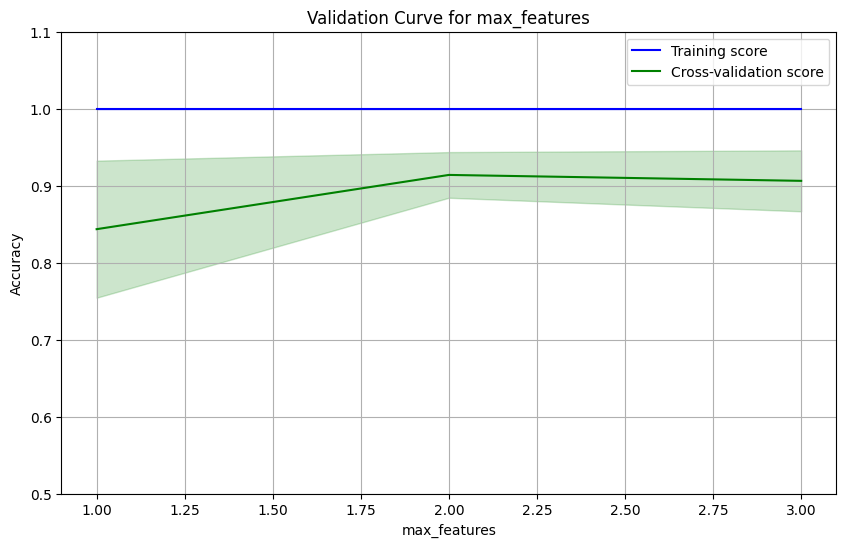

In [57]:
# Определение диапазона значений для max_features
param_range = np.arange(1, X.shape[1] + 1)  # Проверяем значения от 1 до количества признаков (3)

# Построение валидационной кривой для max_features
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=1),
    X_train, y_train,
    param_name="max_features",
    param_range=param_range,
    cv=5,  # 5-кратная кросс-валидация
    scoring="accuracy"  # Метрика качества
)

# Вычисление средних значений и стандартных отклонений
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Построение валидационной кривой
plt.figure(figsize=(10, 6))
plt.title("Validation Curve for max_features")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.1)

# График для обучающей выборки
plt.plot(param_range, train_scores_mean, label="Training score", color="blue")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="blue", alpha=0.2)

# График для тестовой выборки
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="green")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, color="green", alpha=0.2)

plt.legend(loc="best")
plt.grid()
plt.show()

Обучить модель дерева решений с произвольным значением гиперпараметра `max_features` из найденного диапазона и зафиксированными на предыдущих шагах значениями гиперпараметров `max_depth` и `min_samples_leaf` .

Оценить качество модели на обучающей и тестовой выборках по соответствующей метрике.

In [58]:
# Определение гиперпараметров
max_depth = 4  # Зафиксированное значение из предыдущего шага
min_samples_leaf = 10  # Зафиксированное значение из предыдущего шага
max_features = 2  # Выберите значение из найденного диапазона

# Создание и обучение модели дерева решений
tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, max_features=max_features, random_state=1)
tree.fit(X_train, y_train)

# Предсказания на обучающей и тестовой выборках
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Вычисление точности для обучающей выборки
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Точность на обучающей выборке (max_depth={max_depth}, min_samples_leaf={min_samples_leaf}, max_features={max_features}): {accuracy_train:.4f}")

# Вычисление точности для тестовой выборки
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Точность на тестовой выборке (max_depth={max_depth}, min_samples_leaf={min_samples_leaf}, max_features={max_features}): {accuracy_test:.4f}")

Точность на обучающей выборке (max_depth=4, min_samples_leaf=10, max_features=2): 0.9375
Точность на тестовой выборке (max_depth=4, min_samples_leaf=10, max_features=2): 0.8393


Визуализировать полученное дерево решений.

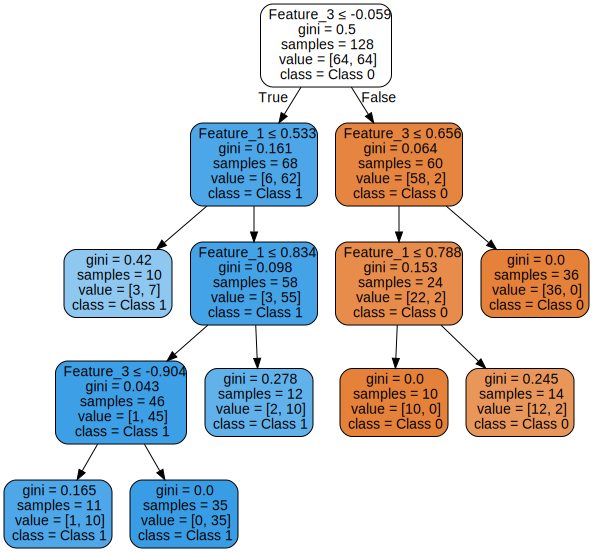

In [59]:
# Экспорт дерева в формате .dot
dot_data = export_graphviz(tree,
                           out_file=None,
                           feature_names=[f"Feature_{i+1}" for i in range(X.shape[1])],  # Имена признаков
                           class_names=["Class 0", "Class 1"],  # Имена классов
                           filled=True,  # Заливка узлов
                           rounded=True,  # Закругленные углы
                           special_characters=True)  # Специальные символы

# Визуализация дерева в блокноте
graph = graphviz.Source(dot_data)
graph

## Поиск на сетке

Определить оптимальные значения гиперпараметров модели дерева решений с использованием поиска на сетке.

Использовать `random_state` - номер варианта.

In [64]:
# Определение сетки гиперпараметров
param_grid = {
    'max_depth': [3, 5, 7, 10],  # Возможные значения для max_depth
    'min_samples_leaf': [1, 5, 10, 20],  # Возможные значения для min_samples_leaf
    'max_features': [1, 2, 3]  # Возможные значения для max_features
}

Вывести оптимальные значения гиперпараметров.

In [65]:
# Вывод оптимальных гиперпараметров
print("Оптимальные гиперпараметры:")
print(grid_search.best_params_)

Оптимальные гиперпараметры:
{'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1}


Обучить модель дерева решений с найденными оптимальными значениями гиперпараметров.

In [68]:
# Обучение модели с оптимальными гиперпараметрами
best_tree = grid_search.best_estimator_


Вычислить метрику качества модели дерева решений на обучающей и тестовой выборках:
- для задачи классификации - accuracy;

In [69]:
# Предсказания на обучающей и тестовой выборках
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)

# Вычисление точности для обучающей выборки
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Точность на обучающей выборке: {accuracy_train:.4f}")

# Вычисление точности для тестовой выборки
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Точность на тестовой выборке: {accuracy_test:.4f}")

Точность на обучающей выборке: 0.9766
Точность на тестовой выборке: 0.8571


## Отсечение дерева решений

Вычислить значения параметра регуляризации $\alpha$ и соответствующие им совокупные ошибки листьев в поддеревьях.

Значения alpha:
[0.         0.00732422 0.00755208 0.0078125  0.0144381  0.0407664
 0.38431373]

Совокупные ошибки листьев:
[0.         0.01464844 0.04485677 0.06048177 0.07491987 0.11568627
 0.5       ]


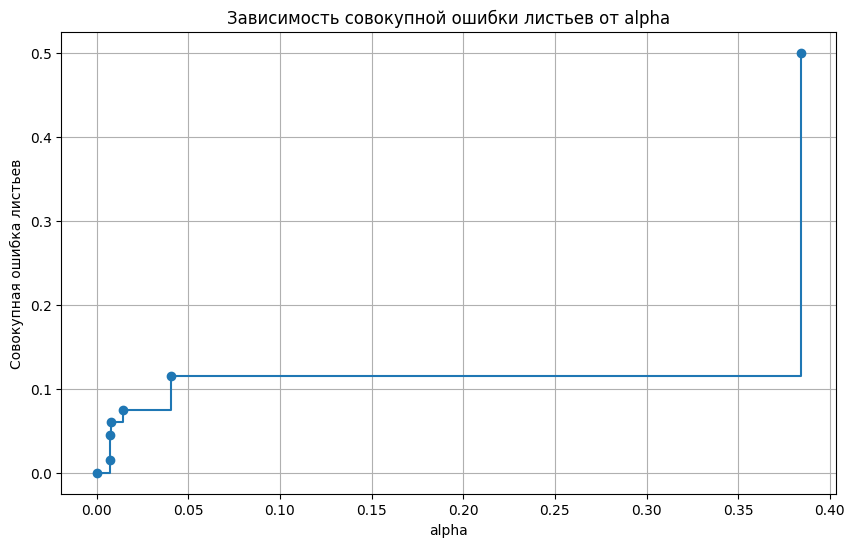

In [71]:
tree = DecisionTreeClassifier(random_state=1)
path = tree.cost_complexity_pruning_path(X_train, y_train)
# Получение значений alpha и соответствующих им совокупных ошибок листьев
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Вывод значений alpha и совокупных ошибок листьев
print("Значения alpha:")
print(ccp_alphas)
print("\nСовокупные ошибки листьев:")
print(impurities)

# Построение графика зависимости совокупной ошибки от alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.title("Зависимость совокупной ошибки листьев от alpha")
plt.xlabel("alpha")
plt.ylabel("Совокупная ошибка листьев")
plt.grid()
plt.show()

Обучить модель дерева решений с найденными значениями параметра $\alpha$.

In [72]:
# Оптимальное значение alpha (выберите из предыдущего шага)
optimal_alpha = 0.02  # Пример значения, замените на найденное оптимальное значение

# Обучение модели дерева решений с оптимальным значением alpha
tree = DecisionTreeClassifier(ccp_alpha=optimal_alpha, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.02, random_state=1)

Для каждой обученной модели дерева решений вычислить метрики качества для обучающей и тестовой выборок:
- для задачи классификации - accuracy;


In [73]:
# Предсказания на обучающей и тестовой выборках
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Вычисление точности для обучающей выборки
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Точность на обучающей выборке (alpha={optimal_alpha}): {accuracy_train:.4f}")

# Вычисление точности для тестовой выборки
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Точность на тестовой выборке (alpha={optimal_alpha}): {accuracy_test:.4f}")

Точность на обучающей выборке (alpha=0.02): 0.9609
Точность на тестовой выборке (alpha=0.02): 0.8393


Построить график зависимости метрик качества для обучающей и тестовой выборок от параметра $\alpha$.

Оценить оптимальное значение параметра регуляризации $\alpha$.

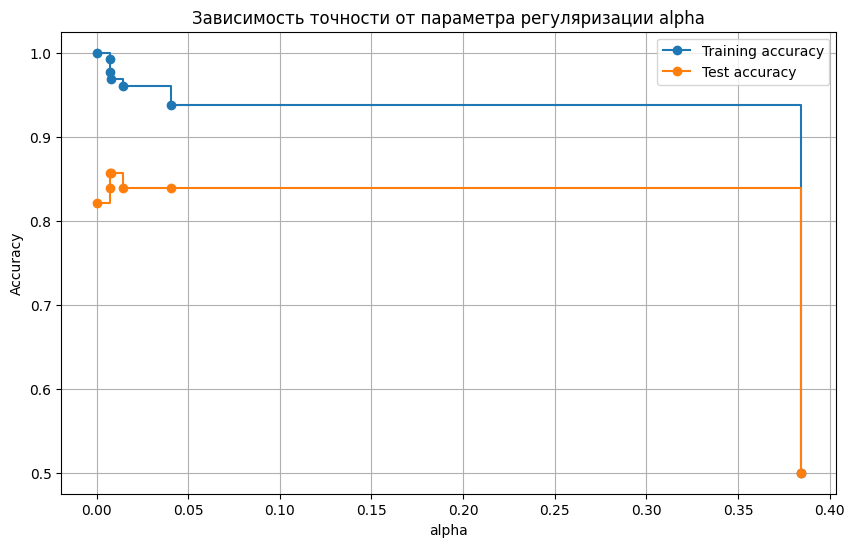

Оптимальное значение alpha: 0.0076
Максимальная точность на тестовой выборке: 0.8571


In [76]:
# Обучение дерева решений с использованием Cost Complexity Pruning
tree = DecisionTreeClassifier(random_state=1)
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Списки для хранения точности на обучающей и тестовой выборках
train_scores = []
test_scores = []

# Обучение модели для каждого значения alpha
for alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha=alpha, random_state=1)
    tree.fit(X_train, y_train)

    # Точность на обучающей выборке
    y_train_pred = tree.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)

    # Точность на тестовой выборке
    y_test_pred = tree.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_accuracy)

# Построение графика зависимости точности от alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label="Training accuracy", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test accuracy", drawstyle="steps-post")
plt.title("Зависимость точности от параметра регуляризации alpha")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# Оценка оптимального значения alpha
optimal_alpha_index = test_scores.index(max(test_scores))
optimal_alpha = ccp_alphas[optimal_alpha_index]
print(f"Оптимальное значение alpha: {optimal_alpha:.4f}")
print(f"Максимальная точность на тестовой выборке: {max(test_scores):.4f}")


Обучить модель дерева решений с найденным значением параметра регуляризации $\alpha$, задав его значение в гиперпараметре `ccp_alpha`. Остальные гиперпараметры модели оставить по умолчанию.

In [77]:
# Найденное оптимальное значение alpha
optimal_alpha = 0.0076  # Замените на найденное оптимальное значение

# Обучение модели дерева решений с оптимальным значением alpha
tree = DecisionTreeClassifier(ccp_alpha=optimal_alpha, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0076, random_state=1)

Вычислить метрику качества модели дерева решений на обучающей и тестовой выборках:
- для задачи классификации - accuracy;


In [78]:
# # Предсказания на обучающей и тестовой выборках
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# Вычисление точности для обучающей выборки
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Точность на обучающей выборке (alpha={optimal_alpha}): {accuracy_train:.4f}")

# Вычисление точности для тестовой выборки
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Точность на тестовой выборке (alpha={optimal_alpha}): {accuracy_test:.4f}")

Точность на обучающей выборке (alpha=0.0076): 0.9766
Точность на тестовой выборке (alpha=0.0076): 0.8571


# **5. Использование модели для предсказания**

Задать произвольный объект и определить:
- для задачи классификации - какому классу он будет принадлежать и вероятности принадлежности к каждому классу;


In [83]:
# Задание произвольного объекта
new_object = [[0.5, 1.2, -0.8]]  # Пример значений признаков

# Определение класса объекта
predicted_class = tree.predict(new_object)
print(f"Предсказанный класс объекта: {predicted_class[0]}")

# Определение вероятностей принадлежности к каждому классу
class_probabilities = tree.predict_proba(new_object)
print(f"Вероятности принадлежности к классам: {class_probabilities[0]}")

Предсказанный класс объекта: 1
Вероятности принадлежности к классам: [0.0625 0.9375]


# **6. Оценивание важности признаков**

Оценить степень важности признаков методом Mean decrease impurity (MDI).

Использовать атрибут `feature_importances_` классов `DecisionTreeClassifier` или `DecisionTreeRegressor` .

In [85]:
# Получение важности признаков
feature_importances = tree.feature_importances_

# Вывод важности признаков
print("Важность признаков:")
for feature, importance in zip([f"Feature_{i+1}" for i in range(X.shape[1])], feature_importances):
    print(f"{feature}: {importance:.4f}")


Важность признаков:
Feature_1: 0.1213
Feature_2: 0.0343
Feature_3: 0.8444


Построить диаграмму `bar` для визуализации степени важности признаков.

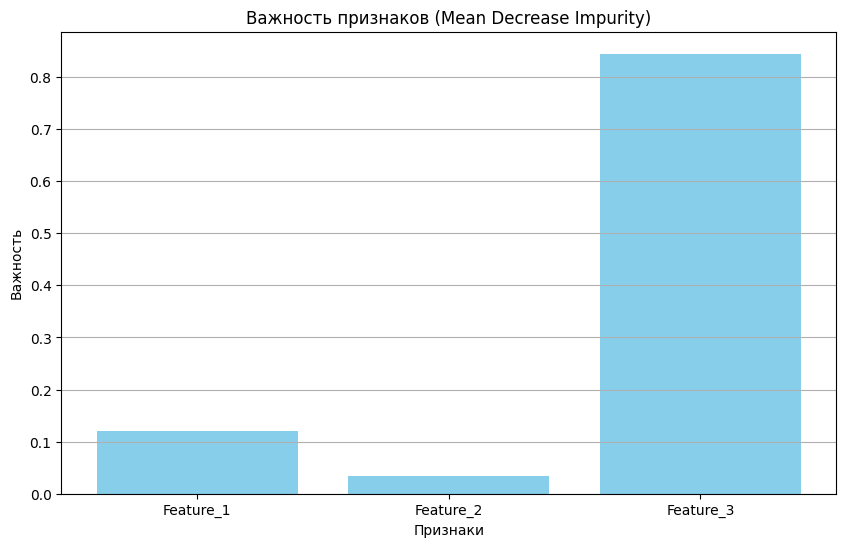

In [86]:
# Визуализация важности признаков с помощью диаграммы bar
plt.figure(figsize=(10, 6))
plt.bar([f"Feature_{i+1}" for i in range(X.shape[1])], feature_importances, color='skyblue')
plt.title("Важность признаков (Mean Decrease Impurity)")
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.grid(axis='y')
plt.show()

Оценить степень важности признаков методом Permutation feature importance.

Использовать лласс `permutation_importance` модуля `inspection` библиотеки `sklearn`.


In [90]:
# Оценка важности признаков методом Permutation Feature Importance
result = permutation_importance(tree, X_test, y_test, n_repeats=10, random_state=1)

# Получение важности признаков
feature_importances = result.importances_mean

# Вывод важности признаков
print("Важность признаков (Permutation Feature Importance):")
for feature, importance in zip([f"Feature_{i+1}" for i in range(X.shape[1])], feature_importances):
    print(f"{feature}: {importance:.4f}")

Важность признаков (Permutation Feature Importance):
Feature_1: 0.0964
Feature_2: 0.0000
Feature_3: 0.2571


Построить диаграмму `bar` для визуализации степени важности признаков.

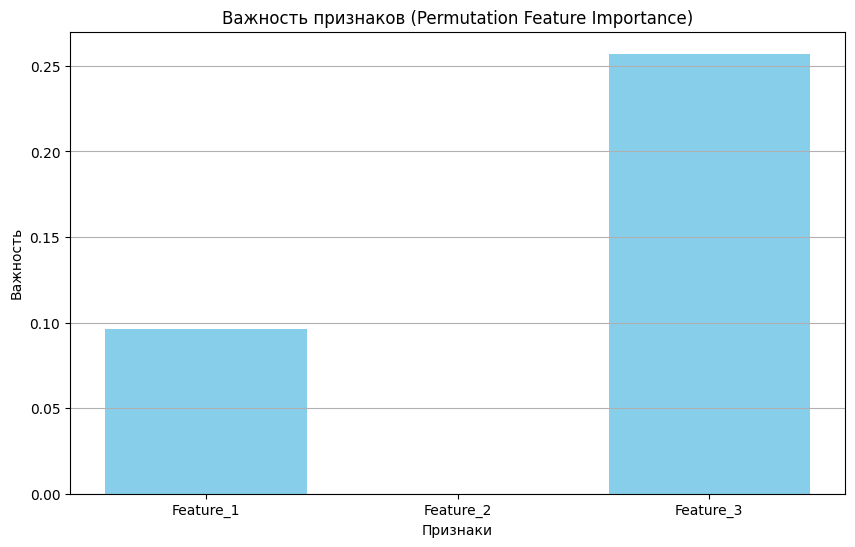

In [91]:
# # Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.bar([f"Feature_{i+1}" for i in range(X.shape[1])], feature_importances, color='skyblue')
plt.title("Важность признаков (Permutation Feature Importance)")
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.grid(axis='y')
plt.show()